In [204]:
import numpy as np
from scipy import stats
import math
from math import floor
import argparse
import matplotlib.pyplot as plt
import matplotlib
import os
import csv
import pymc as pm
import arviz as az
import warnings
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

if not os.path.exists("plots"):
    os.makedirs("plots")

In [2]:
# Specify the root directory containing the data folders
root_directory = 'data'
 
# Initialize an empty list to store the data
 
data_dict={}
 
# Iterate through folders in the root directory
for root, directories, files in os.walk(root_directory):
    for folder in directories:
        # if folder begins with 0.5
        # if folder.startswith('0.5_1.0'):
        data_list = []
        # for each folder in the folder
        for root2, directories2, files2 in os.walk(root_directory + '/' + folder):
            print(root_directory + '/' + folder)
            for folder2 in directories2:
                # Read the data file
                data_file = root_directory + '/' + folder + '/' + folder2 + '/group_interactions.csv'
                #ignore first line
                with open(data_file, 'r') as f:
                    next(f)
                    reader = csv.reader(f)
                    for row in reader:
                        data_list.append(row[1:])
        data_dict[folder] = data_list
 
 
 
for key in data_dict.keys():
    # Create a pandas DataFrame from the list of lists
    df = pd.DataFrame(data_dict[key])
    # plot distribution of the first column
    # plt.hist(df[0].astype(float), bins=10, alpha=0.5, label=key)
    # Label the x-axis
    # plt.xlabel('num users')
    # Label the y-axis
    # plt.ylabel('density')
    # Add a title
    # plt.title('Distribution of num users for ' + key)
    # plt.show()

data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_0.1_0.1
data/0.5_0.2_

In [83]:
# data_dict['0.5_0.2_0.1_0.1']

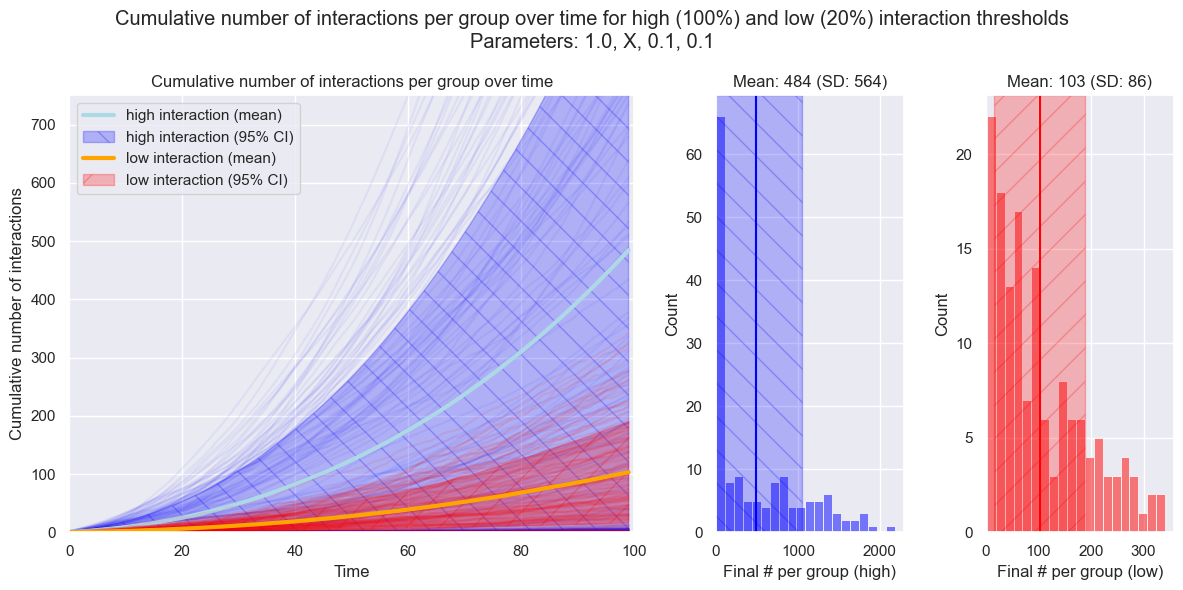

In [255]:
# user_growth_rate, interaction_threshold, new_group_rate, new_community_rate
val_title = "1.0, X, 0.1, 0.1"
test_data_2 = data_dict["1.0_0.2_0.1_0.1"]  # low interaction threshold
test_data_1 = data_dict["1.0_1.0_0.1_0.1"]  # high interaction threshold
test_data_1 = np.array(test_data_1)
test_data_2 = np.array(test_data_2)

test_data_1 = [[int(entry) for entry in sublist] for sublist in test_data_1]
test_data_2 = [[int(entry) for entry in sublist] for sublist in test_data_2]

# Calculate cumulatives for test_data_1
cumulatives_1 = []
for i in range(len(test_data_1)):
    if np.sum(test_data_1[i]) <= 1:
        continue
    l = np.cumsum(test_data_1[i])
    if len(l) > 100:
        l = l[:100]
    elif len(l) < 100:
        l = np.pad(l, (0, 100 - len(l)), "constant")
    cumulatives_1.append(l)
cumulatives_1 = np.array(cumulatives_1)

# Calculate cumulatives for test_data_2
cumulatives_2 = []
for i in range(len(test_data_2)):
    if np.sum(test_data_2[i]) <= 1:
        continue
    l = np.cumsum(test_data_2[i])
    if len(l) > 100:
        l = l[:100]
    elif len(l) < 100:
        l = np.pad(l, (0, 100 - len(l)), "constant")
    cumulatives_2.append(l)
cumulatives_2 = np.array(cumulatives_2)

# Calculate mean and std for both datasets
mean_cumulatives_1 = np.mean(cumulatives_1, axis=0)
std_cumulatives_1 = np.std(cumulatives_1, axis=0)

mean_cumulatives_2 = np.mean(cumulatives_2, axis=0)
std_cumulatives_2 = np.std(cumulatives_2, axis=0)

fig, axes = plt.subplots(figsize=(12, 6), ncols=3, gridspec_kw={"width_ratios": [3, 1, 1]})

# Plot test_data_1 (black)
for i in range(len(cumulatives_1)):
    axes[0].plot(cumulatives_1[i], alpha=0.05, color="blue", label="_nolegend_")
axes[0].plot(mean_cumulatives_1, color="lightblue", label="high interaction (mean)", linewidth=3)
axes[0].fill_between(
    np.arange(100),
    mean_cumulatives_1 - std_cumulatives_1,
    mean_cumulatives_1 + std_cumulatives_1,
    alpha=0.25,
    color="blue",
    label="high interaction (95% CI)",
    hatch="\\",
)

# Plot test_data_2 (red)
for i in range(len(cumulatives_2)):
    axes[0].plot(cumulatives_2[i], alpha=0.075, color="red", label="_nolegend_")
axes[0].plot(mean_cumulatives_2, color="orange", label="low interaction (mean)", linewidth=3)
axes[0].fill_between(
    np.arange(100),
    mean_cumulatives_2 - std_cumulatives_2,
    mean_cumulatives_2 + std_cumulatives_2,
    alpha=0.25,
    color="red",
    label="low interaction (95% CI)",
    hatch="/",
)

# legend
axes[0].legend()
axes[0].set_xlim(left=0, right=100)
axes[0].set_ylim(bottom=0, top=750)
# log y
# Axes and titles for the first subplot
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Cumulative number of interactions")
axes[0].set_title("Cumulative number of interactions per group over time")

# density plots of final values
sns.histplot(cumulatives_1[:, -1], color="blue", label="high interaction threshold", ax=axes[1], alpha=0.5, bins=20)
sns.histplot(cumulatives_2[:, -1], color="red", label="low interaction threshold", ax=axes[2], alpha=0.5, bins=20)

# mean and std for both
axes[1].axvline(mean_cumulatives_1[-1], color="blue", label="high interaction threshold (mean)")
axes[1].axvspan(
    mean_cumulatives_1[-1] - std_cumulatives_1[-1],
    mean_cumulatives_1[-1] + std_cumulatives_1[-1],
    alpha=0.25,
    color="blue",
    label="high interaction threshold (95% CI)",
    hatch="\\",
)

axes[2].axvline(mean_cumulatives_2[-1], color="red", label="low interaction threshold (mean)")
axes[2].axvspan(
    mean_cumulatives_2[-1] - std_cumulatives_2[-1],
    mean_cumulatives_2[-1] + std_cumulatives_2[-1],
    alpha=0.25,
    color="red",
    label="low interaction threshold (95% CI)",
    hatch="/",
)

axes[1].set_xlim(left=0)
# axes[1].set_yscale("log")
axes[1].set_xlabel("Final # per group (high)")
axes[1].set_ylabel("Count")
axes[1].set_title("Mean: " + str(floor(mean_cumulatives_1[-1])) + " (SD: " + str(floor(std_cumulatives_1[-1])) + ")")


axes[2].set_xlim(left=0)
# axes[2].set_yscale("log")
axes[2].set_xlabel("Final # per group (low)")
axes[2].set_ylabel("Count")
axes[2].set_title("Mean: " + str(floor(mean_cumulatives_2[-1])) + " (SD: " + str(floor(std_cumulatives_2[-1])) + ")")

plt.suptitle("Cumulative number of interactions per group over time for high (100%) and low (20%) interaction thresholds" + "\n" + "Parameters: " + val_title)
plt.tight_layout()
plt.savefig("plots/cumulative_" + val_title + ".png")
plt.show()

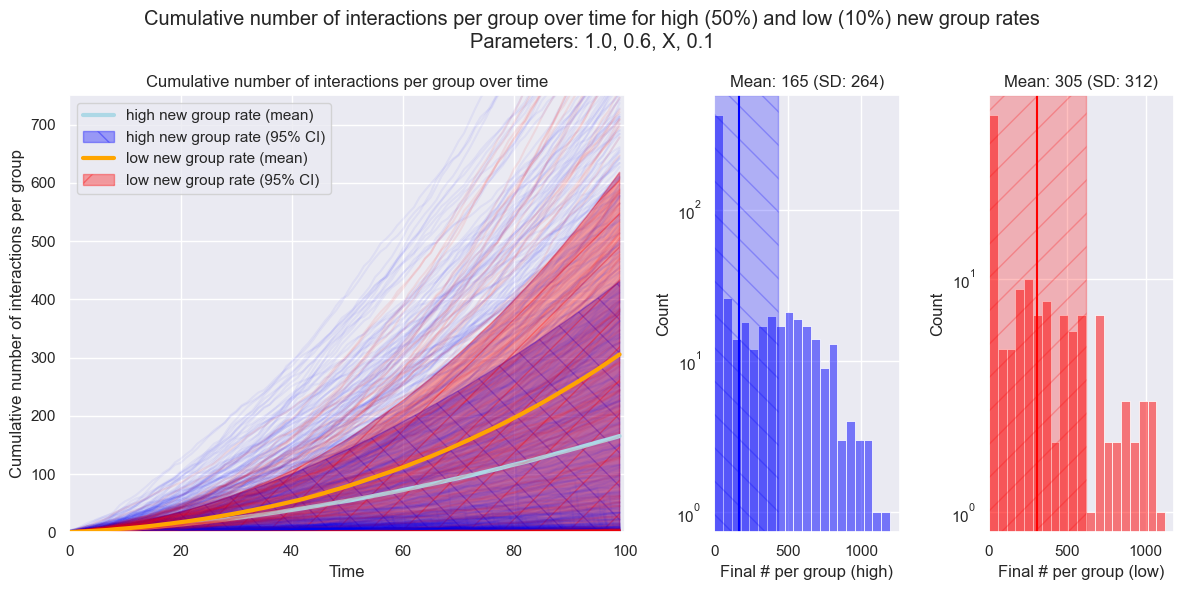

In [256]:
# user_growth_rate, interaction_threshold, new_group_rate, new_community_rate
val_title = "1.0, 0.6, X, 0.1"
test_data_2 = data_dict["1.0_0.6_0.1_0.1"]  # low new group rate
test_data_1 = data_dict["1.0_0.6_0.5_0.1"]  # high new group rate
test_data_1 = np.array(test_data_1)
test_data_2 = np.array(test_data_2)

test_data_1 = [[int(entry) for entry in sublist] for sublist in test_data_1]
test_data_2 = [[int(entry) for entry in sublist] for sublist in test_data_2]

# Calculate cumulatives for test_data_1
cumulatives_1 = []
for i in range(len(test_data_1)):
    if np.sum(test_data_1[i]) <= 1:
        continue
    l = np.cumsum(test_data_1[i])
    if len(l) > 100:
        l = l[:100]
    elif len(l) < 100:
        l = np.pad(l, (0, 100 - len(l)), "constant")
    cumulatives_1.append(l)
cumulatives_1 = np.array(cumulatives_1)

# Calculate cumulatives for test_data_2
cumulatives_2 = []
for i in range(len(test_data_2)):
    if np.sum(test_data_2[i]) <= 1:
        continue
    l = np.cumsum(test_data_2[i])
    if len(l) > 100:
        l = l[:100]
    elif len(l) < 100:
        l = np.pad(l, (0, 100 - len(l)), "constant")
    cumulatives_2.append(l)
cumulatives_2 = np.array(cumulatives_2)

# Calculate mean and std for both datasets
mean_cumulatives_1 = np.mean(cumulatives_1, axis=0)
std_cumulatives_1 = np.std(cumulatives_1, axis=0)

mean_cumulatives_2 = np.mean(cumulatives_2, axis=0)
std_cumulatives_2 = np.std(cumulatives_2, axis=0)

fig, axes = plt.subplots(figsize=(12, 6), ncols=3, gridspec_kw={"width_ratios": [3, 1, 1]})

# Plot test_data_1 (black)
for i in range(len(cumulatives_1)):
    axes[0].plot(cumulatives_1[i], alpha=0.05, color="blue", label="_nolegend_")
axes[0].plot(mean_cumulatives_1, color="lightblue", label="high new group rate (mean)", linewidth=3)
axes[0].fill_between(
    np.arange(100),
    mean_cumulatives_1 - std_cumulatives_1,
    mean_cumulatives_1 + std_cumulatives_1,
    alpha=0.35,
    color="blue",
    label="high new group rate (95% CI)",
    hatch="\\",
)

# Plot test_data_2 (red)
for i in range(len(cumulatives_2)):
    axes[0].plot(cumulatives_2[i], alpha=0.075, color="red", label="_nolegend_")
axes[0].plot(mean_cumulatives_2, color="orange", label="low new group rate (mean)", linewidth=3)
axes[0].fill_between(
    np.arange(100),
    mean_cumulatives_2 - std_cumulatives_2,
    mean_cumulatives_2 + std_cumulatives_2,
    alpha=0.35,
    color="red",
    label="low new group rate (95% CI)",
    hatch="/",
)

# legend
axes[0].legend()
axes[0].set_xlim(left=0, right=100)
axes[0].set_ylim(bottom=0, top=750)
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Cumulative number of interactions per group")
axes[0].set_title("Cumulative number of interactions per group over time")

# density plots of final values
sns.histplot(cumulatives_1[:, -1], color="blue", label="high new group rate", ax=axes[1], bins=20, alpha=0.5)
axes[1].axvline(mean_cumulatives_1[-1], color="blue", label="high new group rate (mean)")
axes[1].axvspan(
    mean_cumulatives_1[-1] - std_cumulatives_1[-1],
    mean_cumulatives_1[-1] + std_cumulatives_1[-1],
    alpha=0.25,
    color="blue",
    label="high new group rate (95% CI)",
    hatch="\\",
)
sns.histplot(cumulatives_2[:, -1], color="red", label="low new group rate", ax=axes[2], bins=20, alpha=0.5)
axes[2].axvline(mean_cumulatives_2[-1], color="red", label="low new group rate (mean)")
axes[2].axvspan(
    mean_cumulatives_2[-1] - std_cumulatives_2[-1],
    mean_cumulatives_2[-1] + std_cumulatives_2[-1],
    alpha=0.25,
    color="red",
    label="low new group rate (95% CI)",
    hatch="/",
)

axes[1].set_xlim(left=0)
axes[1].set_yscale("log")
axes[1].set_xlabel("Final # per group (high)")
axes[1].set_ylabel("Count")
axes[1].set_title("Mean: " + str(floor(mean_cumulatives_1[-1])) + " (SD: " + str(floor(std_cumulatives_1[-1])) + ")")

axes[2].set_xlim(left=0)
axes[2].set_yscale("log")
axes[2].set_xlabel("Final # per group (low)")
axes[2].set_ylabel("Count")
axes[2].set_title("Mean: " + str(floor(mean_cumulatives_2[-1])) + " (SD: " + str(floor(std_cumulatives_2[-1])) + ")")

plt.suptitle("Cumulative number of interactions per group over time for high (50%) and low (10%) new group rates" + "\n" + "Parameters: " + val_title)
plt.tight_layout()
plt.savefig("plots/cumulative_" + val_title + ".png")
plt.show()

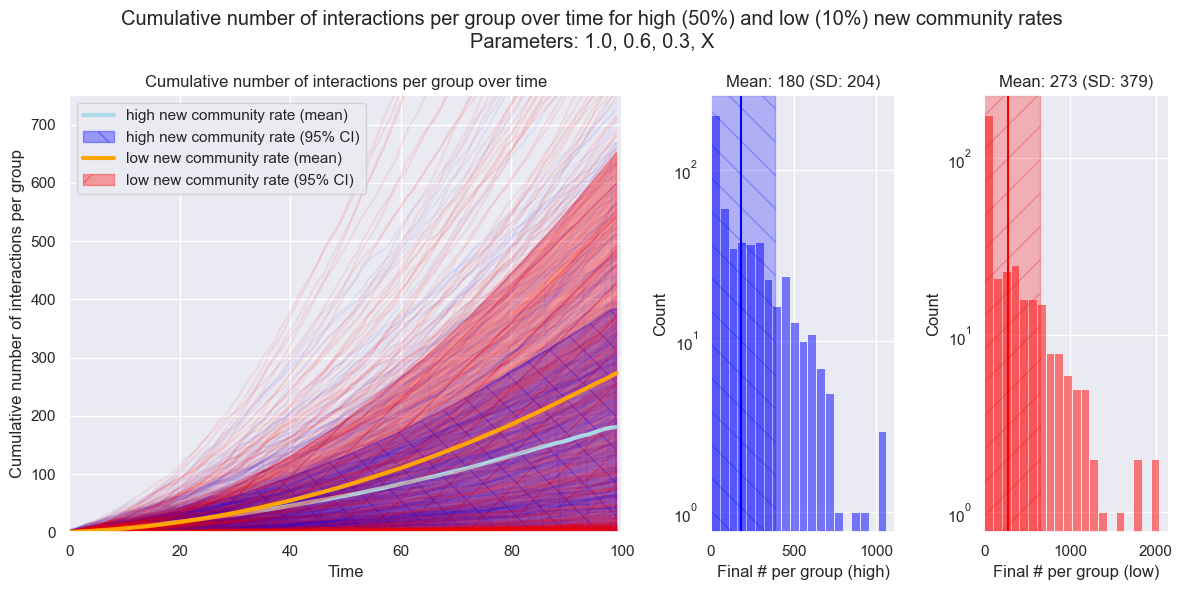

In [257]:
# user_growth_rate, interaction_threshold, new_group_rate, new_community_rate
val_title = "1.0, 0.6, 0.3, X"
test_data_2 = data_dict["1.0_0.6_0.3_0.1"]  # low new community rate
test_data_1 = data_dict["1.0_0.6_0.3_0.5"]  # high new community rate
test_data_1 = np.array(test_data_1)
test_data_2 = np.array(test_data_2)

test_data_1 = [[int(entry) for entry in sublist] for sublist in test_data_1]
test_data_2 = [[int(entry) for entry in sublist] for sublist in test_data_2]

# Calculate cumulatives for test_data_1
cumulatives_1 = []
for i in range(len(test_data_1)):
    if np.sum(test_data_1[i]) <= 1:
        continue
    l = np.cumsum(test_data_1[i])
    if len(l) > 100:
        l = l[:100]
    elif len(l) < 100:
        l = np.pad(l, (0, 100 - len(l)), "constant")
    cumulatives_1.append(l)
cumulatives_1 = np.array(cumulatives_1)

# Calculate cumulatives for test_data_2
cumulatives_2 = []
for i in range(len(test_data_2)):
    if np.sum(test_data_2[i]) <= 1:
        continue
    l = np.cumsum(test_data_2[i])
    if len(l) > 100:
        l = l[:100]
    elif len(l) < 100:
        l = np.pad(l, (0, 100 - len(l)), "constant")
    cumulatives_2.append(l)
cumulatives_2 = np.array(cumulatives_2)

# Calculate mean and std for both datasets
mean_cumulatives_1 = np.mean(cumulatives_1, axis=0)
std_cumulatives_1 = np.std(cumulatives_1, axis=0)

mean_cumulatives_2 = np.mean(cumulatives_2, axis=0)
std_cumulatives_2 = np.std(cumulatives_2, axis=0)

fig, axes = plt.subplots(figsize=(12, 6), ncols=3, gridspec_kw={"width_ratios": [3, 1, 1]})

# Plot test_data_1 (black)
for i in range(len(cumulatives_1)):
    axes[0].plot(cumulatives_1[i], alpha=0.05, color="blue", label="_nolegend_")
axes[0].plot(mean_cumulatives_1, color="lightblue", label="high new community rate (mean)", linewidth=3)
axes[0].fill_between(
    np.arange(100),
    mean_cumulatives_1 - std_cumulatives_1,
    mean_cumulatives_1 + std_cumulatives_1,
    alpha=0.35,
    color="blue",
    label="high new community rate (95% CI)",
    hatch="\\",
)

# Plot test_data_2 (red)
for i in range(len(cumulatives_2)):
    axes[0].plot(cumulatives_2[i], alpha=0.075, color="red", label="_nolegend_")
axes[0].plot(mean_cumulatives_2, color="orange", label="low new community rate (mean)", linewidth=3)
axes[0].fill_between(
    np.arange(100),
    mean_cumulatives_2 - std_cumulatives_2,
    mean_cumulatives_2 + std_cumulatives_2,
    alpha=0.35,
    color="red",
    label="low new community rate (95% CI)",
    hatch="/",
)

# legend
axes[0].legend()
axes[0].set_xlim(left=0, right=100)
axes[0].set_ylim(bottom=0, top=750)
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Cumulative number of interactions per group")
axes[0].set_title("Cumulative number of interactions per group over time")

# density plots of final values
sns.histplot(cumulatives_1[:, -1], color="blue", label="high new community rate", ax=axes[1], bins=20, alpha=0.5)
axes[1].axvline(mean_cumulatives_1[-1], color="blue", label="high new community rate (mean)")
axes[1].axvspan(
    mean_cumulatives_1[-1] - std_cumulatives_1[-1],
    mean_cumulatives_1[-1] + std_cumulatives_1[-1],
    alpha=0.25,
    color="blue",
    label="high new community rate (95% CI)",
    hatch="\\",
)

sns.histplot(cumulatives_2[:, -1], color="red", label="low new community rate", ax=axes[2], bins=20, alpha=0.5)
axes[2].axvline(mean_cumulatives_2[-1], color="red", label="low new community rate (mean)")
axes[2].axvspan(
    mean_cumulatives_2[-1] - std_cumulatives_2[-1],
    mean_cumulatives_2[-1] + std_cumulatives_2[-1],
    alpha=0.25,
    color="red",
    label="low new community rate (95% CI)",
    hatch="/",
)

axes[1].set_xlim(left=0)
axes[1].set_yscale("log")
axes[1].set_xlabel("Final # per group (high)")
axes[1].set_ylabel("Count")
axes[1].set_title("Mean: " + str(floor(mean_cumulatives_1[-1])) + " (SD: " + str(floor(std_cumulatives_1[-1])) + ")")

axes[2].set_xlim(left=0)
axes[2].set_yscale("log")
axes[2].set_xlabel("Final # per group (low)")
axes[2].set_ylabel("Count")
axes[2].set_title("Mean: " + str(floor(mean_cumulatives_2[-1])) + " (SD: " + str(floor(std_cumulatives_2[-1])) + ")")

plt.suptitle("Cumulative number of interactions per group over time for high (50%) and low (10%) new community rates" + "\n" + "Parameters: " + val_title)
plt.tight_layout()
plt.savefig("plots/cumulative_" + val_title + ".png")
plt.show()

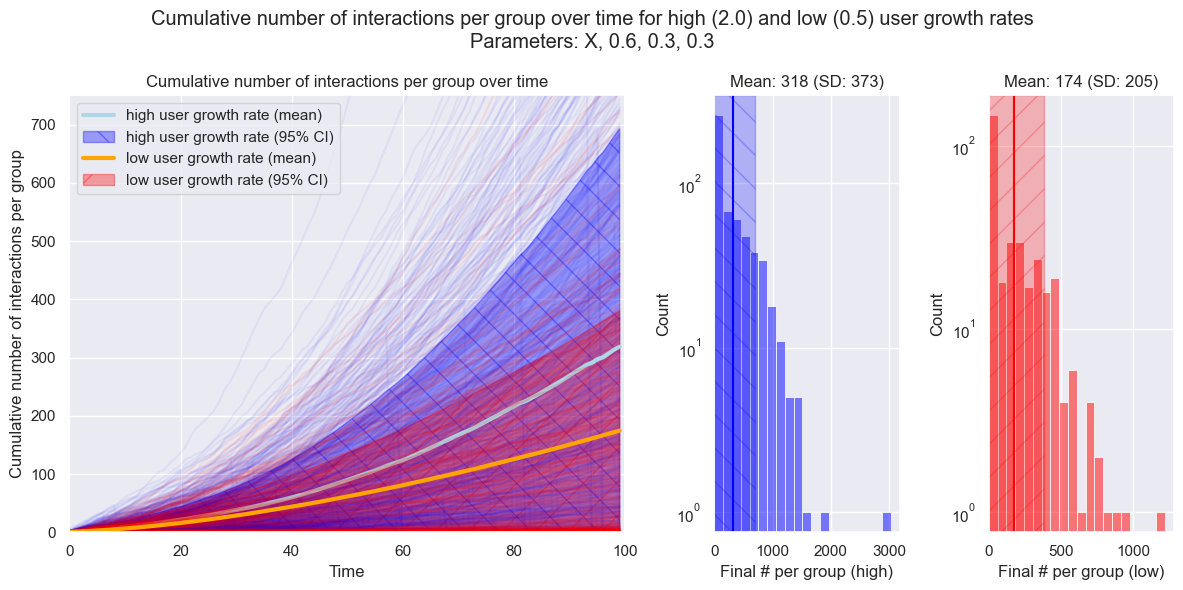

In [258]:
# user_growth_rate, interaction_threshold, new_group_rate, new_community_rate
val_title = "X, 0.6, 0.3, 0.3"
test_data_2 = data_dict["0.5_0.6_0.3_0.1"]  # low user growth rate
test_data_1 = data_dict["2.0_0.6_0.3_0.5"]  # high user growth rate
test_data_1 = np.array(test_data_1)
test_data_2 = np.array(test_data_2)

test_data_1 = [[int(entry) for entry in sublist] for sublist in test_data_1]
test_data_2 = [[int(entry) for entry in sublist] for sublist in test_data_2]

# Calculate cumulatives for test_data_1
cumulatives_1 = []
for i in range(len(test_data_1)):
    if np.sum(test_data_1[i]) <= 1:
        continue
    l = np.cumsum(test_data_1[i])
    if len(l) > 100:
        l = l[:100]
    elif len(l) < 100:
        l = np.pad(l, (0, 100 - len(l)), "constant")
    cumulatives_1.append(l)
cumulatives_1 = np.array(cumulatives_1)

# Calculate cumulatives for test_data_2
cumulatives_2 = []
for i in range(len(test_data_2)):
    if np.sum(test_data_2[i]) <= 1:
        continue
    l = np.cumsum(test_data_2[i])
    if len(l) > 100:
        l = l[:100]
    elif len(l) < 100:
        l = np.pad(l, (0, 100 - len(l)), "constant")
    cumulatives_2.append(l)
cumulatives_2 = np.array(cumulatives_2)

# Calculate mean and std for both datasets
mean_cumulatives_1 = np.mean(cumulatives_1, axis=0)
std_cumulatives_1 = np.std(cumulatives_1, axis=0)

mean_cumulatives_2 = np.mean(cumulatives_2, axis=0)
std_cumulatives_2 = np.std(cumulatives_2, axis=0)

fig, axes = plt.subplots(figsize=(12, 6), ncols=3, gridspec_kw={"width_ratios": [3, 1, 1]})

# Plot test_data_1 (black)
for i in range(len(cumulatives_1)):
    axes[0].plot(cumulatives_1[i], alpha=0.05, color="blue", label="_nolegend_")
axes[0].plot(mean_cumulatives_1, color="lightblue", label="high user growth rate (mean)", linewidth=3)
axes[0].fill_between(
    np.arange(100),
    mean_cumulatives_1 - std_cumulatives_1,
    mean_cumulatives_1 + std_cumulatives_1,
    alpha=0.35,
    color="blue",
    label="high user growth rate (95% CI)",
    hatch="\\",
)

# Plot test_data_2 (red)
for i in range(len(cumulatives_2)):
    axes[0].plot(cumulatives_2[i], alpha=0.075, color="red", label="_nolegend_")
axes[0].plot(mean_cumulatives_2, color="orange", label="low user growth rate (mean)", linewidth=3)
axes[0].fill_between(
    np.arange(100),
    mean_cumulatives_2 - std_cumulatives_2,
    mean_cumulatives_2 + std_cumulatives_2,
    alpha=0.35,
    color="red",
    label="low user growth rate (95% CI)",
    hatch="/",
)

# legend
axes[0].legend()
axes[0].set_xlim(left=0, right=100)
axes[0].set_ylim(bottom=0, top=750)
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Cumulative number of interactions per group")
axes[0].set_title("Cumulative number of interactions per group over time")

# density plots of final values
sns.histplot(cumulatives_1[:, -1], color="blue", label="high user growth rate", ax=axes[1], bins=20, alpha=0.5)
axes[1].axvline(mean_cumulatives_1[-1], color="blue", label="high user growth rate (mean)")
axes[1].axvspan(
    mean_cumulatives_1[-1] - std_cumulatives_1[-1],
    mean_cumulatives_1[-1] + std_cumulatives_1[-1],
    alpha=0.25,
    color="blue",
    label="high user growth rate (95% CI)",
    hatch="\\",
)

sns.histplot(cumulatives_2[:, -1], color="red", label="low user growth rate", ax=axes[2], bins=20, alpha=0.5)
axes[2].axvline(mean_cumulatives_2[-1], color="red", label="low user growth rate (mean)")
axes[2].axvspan(
    mean_cumulatives_2[-1] - std_cumulatives_2[-1],
    mean_cumulatives_2[-1] + std_cumulatives_2[-1],
    alpha=0.25,
    color="red",
    label="low user growth rate (95% CI)",
    hatch="/",
)

axes[1].set_xlim(left=0)
axes[1].set_yscale("log")
axes[1].set_xlabel("Final # per group (high)")
axes[1].set_ylabel("Count")
axes[1].set_title("Mean: " + str(floor(mean_cumulatives_1[-1])) + " (SD: " + str(floor(std_cumulatives_1[-1])) + ")")

axes[2].set_xlim(left=0)
axes[2].set_yscale("log")
axes[2].set_xlabel("Final # per group (low)")
axes[2].set_ylabel("Count")
axes[2].set_title("Mean: " + str(floor(mean_cumulatives_2[-1])) + " (SD: " + str(floor(std_cumulatives_2[-1])) + ")")

plt.suptitle("Cumulative number of interactions per group over time for high (2.0) and low (0.5) user growth rates" + "\n" + "Parameters: " + val_title)
plt.tight_layout()
plt.savefig("plots/cumulative_" + val_title + ".png")
plt.show()